In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data


In [48]:
start = '2010-01-01'
end = '2022-12-31'

df = data.DataReader('TSLA', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [49]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-10,825.359985,774.250000,819.309998,800.039978,28133900.0,800.039978
2022-05-11,809.770020,727.200012,795.000000,734.000000,32408200.0,734.000000
2022-05-12,759.659973,680.000000,701.000000,728.000000,46771000.0,728.000000
2022-05-13,787.349976,751.570007,773.479980,769.590027,30651800.0,769.590027
2022-05-16,769.760010,719.088501,767.159973,724.369995,28337706.0,724.369995


In [50]:
df = df.reset_index()
df.head()


,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
1,2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2,2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
3,2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
4,2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [51]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()


,High,Low,Open,Close,Volume
0,5.000,3.508,3.800,4.778,93831500.0
1,6.084,4.660,5.158,4.766,85935500.0
2,5.184,4.054,5.000,4.392,41094000.0
3,4.620,3.742,4.600,3.840,25699000.0
4,4.000,3.166,4.000,3.222,34334500.0


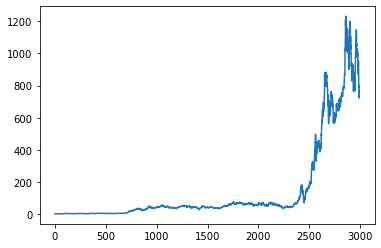

In [52]:
plt.plot(df.Close)

In [53]:
df

,High,Low,Open,Close,Volume
0,5.000000,3.508000,3.800000,4.778000,93831500.0
1,6.084000,4.660000,5.158000,4.766000,85935500.0
2,5.184000,4.054000,5.000000,4.392000,41094000.0
3,4.620000,3.742000,4.600000,3.840000,25699000.0
4,4.000000,3.166000,4.000000,3.222000,34334500.0
...,...,...,...,...,...
2987,825.359985,774.250000,819.309998,800.039978,28133900.0
2988,809.770020,727.200012,795.000000,734.000000,32408200.0
2989,759.659973,680.000000,701.000000,728.000000,46771000.0
2990,787.349976,751.570007,773.479980,769.590027,30651800.0


In [54]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2987    951.410995
2988    949.481796
2989    947.436096
2990    946.132596
2991    943.990995
Name: Close, Length: 2992, dtype: float64

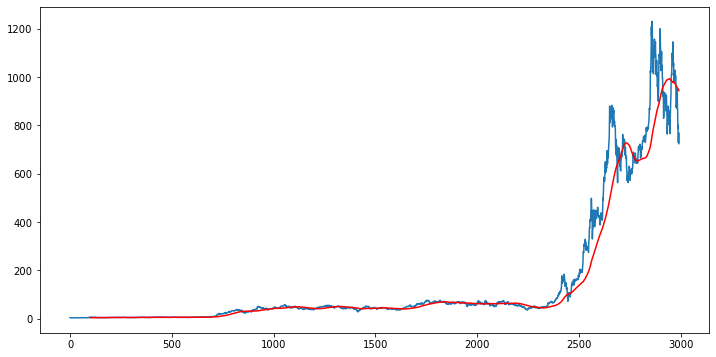

In [55]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [56]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2987    911.855146
2988    912.301246
2989    912.706346
2990    913.167547
2991    913.353397
Name: Close, Length: 2992, dtype: float64

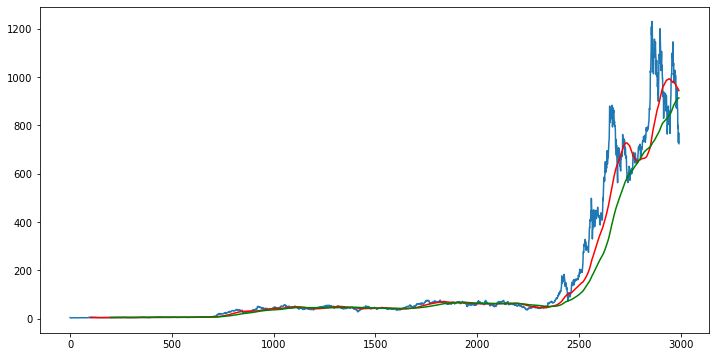

In [57]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [58]:
df.shape

(2992, 5)

In [59]:
#Spliting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2094, 1)
(898, 1)


In [60]:
data_training.head()

,Close
0,4.778
1,4.766
2,4.392
3,3.840
4,3.222


In [61]:
data_testing.head()

,Close
2094,52.189999
2095,58.827999
2096,57.700001
2097,62.972000
2098,66.180000


In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [63]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02191224],
       [0.02174973],
       [0.01668473],
       ...,
       [0.69333693],
       [0.6720206 ],
       [0.66143012]])

In [64]:
data_training_array.shape

(2094, 1)

In [65]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [66]:
#ML model

In [67]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [68]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


model.summary()

In [69]:
model.compile(optimizer='adam' , loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
63/63 [==============================] - 18s 163ms/step - loss: 0.0352
Epoch 2/50
63/63 [==============================] - 11s 168ms/step - loss: 0.0104
Epoch 3/50
63/63 [==============================] - 12s 198ms/step - loss: 0.0090
Epoch 4/50
63/63 [==============================] - 12s 196ms/step - loss: 0.0088
Epoch 5/50
63/63 [==============================] - 13s 201ms/step - loss: 0.0084
Epoch 6/50
63/63 [==============================] - 12s 195ms/step - loss: 0.0087
Epoch 7/50
63/63 [==============================] - 12s 196ms/step - loss: 0.0076
Epoch 8/50
63/63 [==============================] - 14s 220ms/step - loss: 0.0077
Epoch 9/50
63/63 [==============================] - 14s 225ms/step - loss: 0.0074
Epoch 10/50
63/63 [==============================] - 14s 226ms/step - loss: 0.0073
Epoch 11/50
63/63 [==============================] - 15s 231ms/step - loss: 0.0070
Epoch 12/50
63/63 [==============================] - 14s 225ms/step - loss: 0.0077
Epoch 13/50
6

In [70]:
model.save('keras_model.h5')
data_testing.head()

,Close
2094,52.189999
2095,58.827999
2096,57.700001
2097,62.972000
2098,66.180000


In [71]:
data_training.tail(100)

,Close
1994,56.945999
1995,58.363998
1996,59.348000
1997,58.226002
1998,63.900002
...,...
2089,51.917999
2090,55.318001
2091,54.355999
2092,52.782001


In [72]:
past_100_days = data_training.tail(100)

In [73]:
final_df = past_100_days.append(data_testing, ignore_index= True)

In [74]:
final_df.head()

,Close
0,56.945999
1,58.363998
2,59.348000
3,58.226002
4,63.900002


In [75]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.01771352],
       [0.01890101],
       [0.01972505],
       [0.01878545],
       [0.02353708],
       [0.02296594],
       [0.0232289 ],
       [0.02564742],
       [0.02743452],
       [0.02777117],
       [0.02993846],
       [0.03001384],
       [0.03213423],
       [0.02907255],
       [0.03069216],
       [0.02822841],
       [0.02590368],
       [0.02579984],
       [0.02730556],
       [0.02772428],
       [0.02863373],
       [0.02746467],
       [0.02614486],
       [0.02208998],
       [0.02180525],
       [0.0217617 ],
       [0.02337126],
       [0.02403452],
       [0.02344663],
       [0.02306979],
       [0.02343156],
       [0.02196269],
       [0.02407137],
       [0.02426565],
       [0.02365934],
       [0.02254555],
       [0.02080702],
       [0.01984062],
       [0.02173491],
       [0.02138486],
       [0.01979875],
       [0.01862466],
       [0.01995953],
       [0.02041175],
       [0.02856841],
       [0.02833896],
       [0.02730388],
       [0.033

In [76]:
input_data.shape

(998, 1)

In [79]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [80]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(898, 100, 1)
(898,)


In [81]:
# Making Predictions

y_predicted = model.predict(x_test)

29/29 [==============================] - 2s 58ms/step


In [82]:
y_predicted.shape

(898, 1)

In [83]:
y_test

array([0.01373066, 0.01928958, 0.01834495, 0.02275993, 0.02544644,
       0.02610802, 0.02527895, 0.02652171, 0.02768743, 0.02804417,
       0.02720506, 0.02714811, 0.02833728, 0.02887994, 0.02873088,
       0.02551008, 0.02675787, 0.02764053, 0.02838418, 0.02936733,
       0.02922664, 0.02822506, 0.02666743, 0.02459728, 0.0279755 ,
       0.02762713, 0.02828871, 0.02716654, 0.02872585, 0.03006743,
       0.03027009, 0.03083285, 0.02998034, 0.0311829 , 0.03145255,
       0.03142576, 0.03313246, 0.03127669, 0.02838083, 0.02647314,
       0.02579314, 0.02284703, 0.0235823 , 0.01949894, 0.02464082,
       0.02297264, 0.02594388, 0.02576466, 0.02196604, 0.02033136,
       0.02323392, 0.02612644, 0.02619176, 0.02672437, 0.027803  ,
       0.02818654, 0.02603264, 0.02771255, 0.02798388, 0.02819491,
       0.02064959, 0.02009018, 0.01819254, 0.01884909, 0.0197753 ,
       0.01966476, 0.01984564, 0.02173993, 0.02144683, 0.02231609,
       0.02242998, 0.02384693, 0.0231552 , 0.0215289 , 0.02124

In [84]:
y_predicted

array([[0.03640461],
       [0.03629239],
       [0.03618586],
       [0.03609014],
       [0.03601152],
       [0.03595743],
       [0.03593451],
       [0.03594726],
       [0.03599803],
       [0.03608738],
       [0.03621402],
       [0.03637454],
       [0.03656375],
       [0.03677593],
       [0.03700531],
       [0.03724611],
       [0.03749129],
       [0.03773415],
       [0.0379691 ],
       [0.03819218],
       [0.03840114],
       [0.0385949 ],
       [0.03877273],
       [0.03893358],
       [0.03907543],
       [0.03919786],
       [0.0393012 ],
       [0.03938693],
       [0.03945656],
       [0.0395124 ],
       [0.03955764],
       [0.03959583],
       [0.0396305 ],
       [0.03966451],
       [0.03970025],
       [0.0397397 ],
       [0.03978419],
       [0.03983511],
       [0.03989264],
       [0.03995484],
       [0.04001775],
       [0.04007645],
       [0.04012479],
       [0.04015732],
       [0.04016808],
       [0.04015437],
       [0.04011542],
       [0.040

In [85]:
scaler.scale_

array([0.00083744])

In [86]:
scale_factor = 1/0.00083744
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


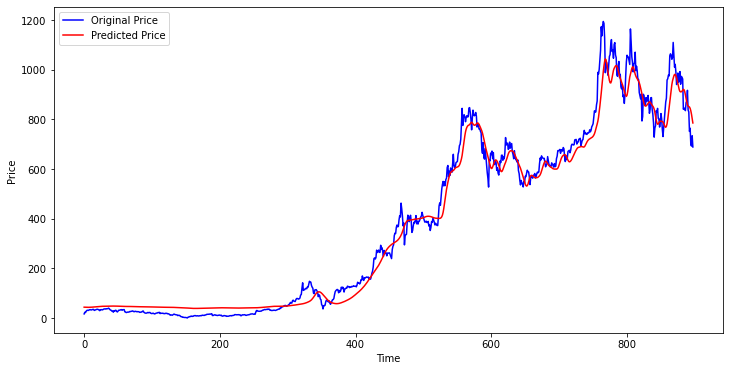

In [87]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()